In [1]:
#!pip install git+http://hf.co/usm3d/tools.git    

  Cloning http://hf.co/usm3d/tools.git to /private/var/folders/kv/6wn44xbs3cn4m50_0n1fvyxr0000gn/T/pip-req-build-eh0z17vm
  Running command git clone --filter=blob:none --quiet http://hf.co/usm3d/tools.git /private/var/folders/kv/6wn44xbs3cn4m50_0n1fvyxr0000gn/T/pip-req-build-eh0z17vm
  Resolved http://hf.co/usm3d/tools.git to commit b9b359817988743e9b97e4191a84ab213ac3bef8
  Preparing metadata (setup.py) ... done
  Created wheel for hoho: filename=hoho-0.0.2-py3-none-any.whl size=19248 sha256=e4cb3dc2d5e6173de34cb8c803c92d6ffa79aabe85bcf9ebec51647425495091
  Stored in directory: /private/var/folders/kv/6wn44xbs3cn4m50_0n1fvyxr0000gn/T/pip-ephem-wheel-cache-n7m6sg94/wheels/53/aa/b8/5c791ee207e162fb058c59822c48025a004ea0a808cc8f7d49
Successfully built hoho


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('..')
from datasets import load_dataset
from handcrafted_solution import *


def read_colmap_rec(colmap_data):
    import pycolmap
    import tempfile,zipfile
    import io
    with tempfile.TemporaryDirectory() as tmpdir:
        with zipfile.ZipFile(io.BytesIO(colmap_data), "r") as zf:
            zf.extractall(tmpdir)  # unpacks cameras.txt, images.txt, etc. to tmpdir
        # Now parse with pycolmap
        rec = pycolmap.Reconstruction(tmpdir)
        return rec



# Loading part of training data

For simplicity we are showing example in a streaming mode

In [3]:

#dataset = load_dataset("usm3d/hoho25k",streaming=False, trust_remote_code=True, num_proc=16)
dataset = load_dataset("usm3d/hoho25k", streaming=True, trust_remote_code=True)


In [50]:
i=0
idx_to_show = 8
for entry in dataset['train']:
    human_entry = {}
    for k, v in entry.items():
        if 'colmap' not in k:
            human_entry[k]=v
        else:
            human_entry[k] = read_colmap_rec(v)
    i+=1
    if i>idx_to_show:
        break
    

# Visualizing inputs

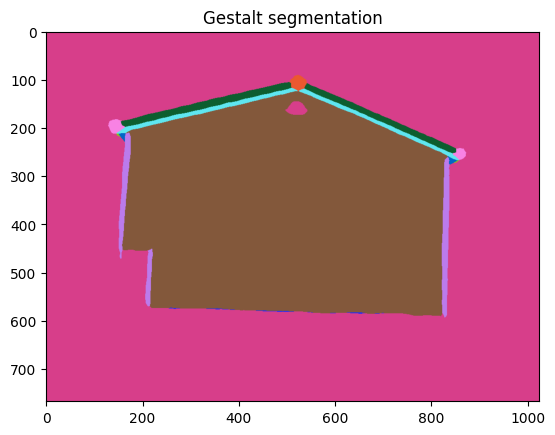

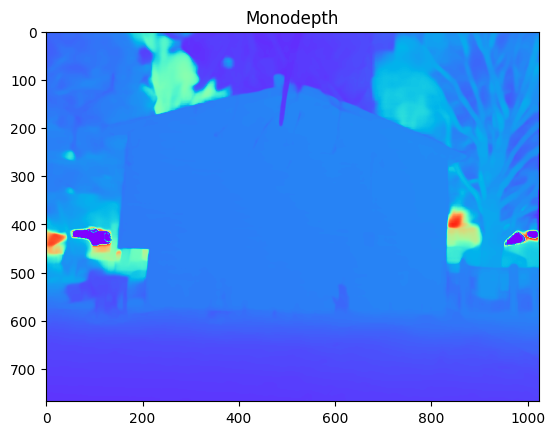

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(human_entry['gestalt'][0])
plt.title('Gestalt segmentation')

plt.figure()
depth = np.array(human_entry['depth'][0])/1000.
depth[depth>50] = 0
depth = depth/depth.max()
plt.title('Monodepth')
plt.imshow(depth, cmap='rainbow')


In [52]:
# Here is the prediction and visualization of single entry
vertices, edges = predict(entry, visualize=True)

0.9705786298738859
0.8177726532267191
0.9463900731357667
0.8904660808777802
0.8998001414420309
0.9693612278858064
0.9036308939877489
0.9435931900227263
